<b>
<p>
<center>
<font size="4">
Substance Abuse and Age Prediction
</font>
</center>
</p>
<p>
<center>
<font size="3">
Capstone Spring 2020 Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Angelica Wiltz
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, The 
    George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Professor: Dr. Nima Zahadat
</font>
</center>
</p>

</b>

###  Project Overview: Purpose and Outline
 My final project for the Capstone course looks at the likelihood of substance abuse and dependency among various age groups. Age ranges are separated into five distinct categories of 12-17 year olds, 18-25 year olds, 26-34 year olds, 35-49 year olds, and 50 years or older. Previous research has used machine learning models to predict correlations between substance abuse, mental health, treatment, and crime. However, the goal of my project is to examine age group categories to understand the likelihood of their experience with substance abuse, and to assess the influence that specific individual characteristics have on a persons likelihood to experience substance abuse.

### Dataset and Analysis 
  For my project, I will be using a dataset from the 2004 National Household Survey on Drug Use and Health. The dataset was published by The National Archive of Criminal Justice Data from ICPSR at the Institute for Social Research at the University of Michigan. An overview of the dataset is provided below:
- Reflects responses that were collected during a survey in 2004
- Contains 3,011 variables and a 55,602 sample size.
- Ages reflected in the dataset are between a range of 12 years old and 65 years or older. 
- Questions in the survey include information regarding past criminal behaviors, substance use, drug abuse history, mental health, income, race, and education level.

In order to analyze the data: 
- I will be using pandas, numpy, matplotlib, sklearn, and seaborn libraries and packages to analyze the dataset in three main sections:
    - Risk of using a specific substance once or twice a week
    - Influence of individual characteristics on substance abuse and dependency
    - Predicting the likelihood of an age group to experience substance abuse and dependency.
  
- I will be using two models for this project:
    - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    
The Table of Contents below provides a description for the outline of my report.

# Table of Contents
- Data Preprocessing
    - Import Python Libraries and Packages
    - Load dataset
    
- Section 1: Exploratory Data Analysis
     - Risk of using a susbtance once or twice a week
     - Seaborn countplot visualization
- Section 2: Random Forest Model Classifier
    - Predicting the influence of individual characteristics on substance abuse and dependency
    - Random forest feature importance visualization
- Section 3: Logistic Regression Model
    - Predicting likelihood of substance abuse and dependency for each model
    - Seaborn distribution plot visualization
- Conclusion

### Data Preprocessing

- Import Python Libraries and Packages
- Load Dataset

In [1]:
#Python Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
import seaborn as sns
import graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from imblearn.over_sampling import RandomOverSampler
import collections
from matplotlib.ticker import PercentFormatter
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load data
data = pd.read_csv('/Users/angiewiltz/Downloads/ICPSR_27521/DS0001/27521-0001-Data.tsv', delimiter= '\t')

### Section 1: Exploratory Data Analysis

- Risk of using a substance once or twice a week
    - Marijuana
    - Alcohol
    - Heroin
    - Cocaine
- Seaborn countplot visualization

In [3]:
# Create a drug risk variable that contains variables from the dataset
# Variables include age group, risk of using marijuana, alcohol, heroin, and cocaine once or twice a week
drug_risk = data[["CATAG3", "RSKMJREG", "RKHERREG", 
                  "RKCOCREG", "RK5ALWK"]]
# Rename columns to reflect substances
drug_risk = drug_risk.rename(columns = {'CATAG3': 'Age Group', 'RSKMJREG':'Marijuana Risk', 'RKHERREG': 'Heroin Risk', 'RKCOCREG':'Cocaine Risk', 'RK5ALWK':'Alcohol Risk'})

# Rename drug risk variable to "age"
age = drug_risk

# Use new age variable to sort age groups into ascending order
# Convert age variable integers into strings in order to be renamed by risk level
age = age.sort_values('Age Group', ascending = True)
age['Age Group'] = age['Age Group'].apply(str)

#### Marijuana

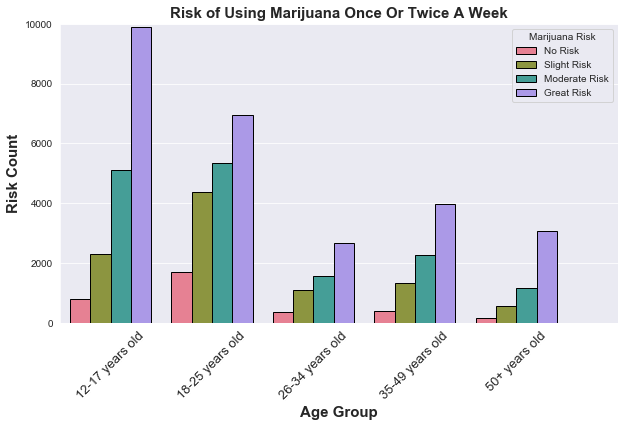

In [4]:
#Create marijuana variable from age variable to only reflect risk of marijuana use
#Eliminate responses less than 94, since 94 represented a non response
marijuana = age.loc[drug_risk["Marijuana Risk"] < 94]

#Sort values into ascending order
#Convert values into strings
d1 = marijuana.sort_values('Marijuana Risk', ascending = True)
d1['Marijuana Risk'] = d1['Marijuana Risk'].apply(str)

#Rename risk levels
d1 = d1.replace({'Marijuana Risk': { '1': 'No Risk'}})
d1 = d1.replace({'Marijuana Risk': { '2' : 'Slight Risk'}})
d1 = d1.replace({'Marijuana Risk': { '3' : 'Moderate Risk'}})
d1 = d1.replace({'Marijuana Risk': { '4' : 'Great Risk'}})

#Prepare seaborn countplot
sns.set_style('darkgrid')
plt.figure(figsize=(10,5.5))
mjr = sns.countplot(x = 'Age Group', hue = 'Marijuana Risk', data = d1, palette = 'husl', edgecolor = 'black')
plt.title('Risk of Using Marijuana Once Or Twice A Week', fontsize = 15, fontweight = 'bold')
plt.ylabel('Risk Count', fontsize = 15, fontweight = 'bold')
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (0, 1, 2, 3, 4, 5)
plt.xticks(positions, labels, fontsize = 12,  rotation = (45))
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylim(0, 10000)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.show(mjr)
mjr.figure.savefig("mjRisk.png", bbox_inches = 'tight')

#### Alcohol

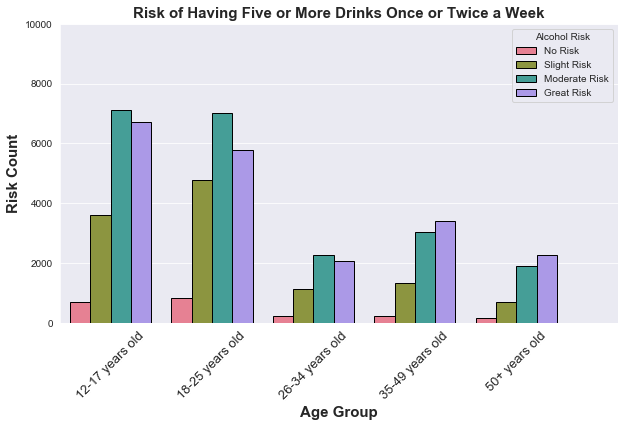

In [5]:
#Create alcohol variable from age variable to only reflect risk of alcohol use
#Eliminate responses less than 94, since 94 represented a non response
alcohol = age.loc[drug_risk["Alcohol Risk"] < 94]

#Sort values into ascending order
#Convert values into strings
d2 = alcohol.sort_values('Alcohol Risk', ascending = True)
d2['Alcohol Risk'] = d2['Alcohol Risk'].apply(str)

#Rename risk levels
d2 = d2.replace({'Alcohol Risk': { '1' : 'No Risk'}})
d2 = d2.replace({'Alcohol Risk': { '2' : 'Slight Risk'}})
d2 = d2.replace({'Alcohol Risk': { '3' : 'Moderate Risk'}})
d2 = d2.replace({'Alcohol Risk': { '4' : 'Great Risk'}})

#Prepare seaborn countplot
plt.figure(figsize=(10,5.5))
alc = sns.countplot(x = 'Age Group', hue = 'Alcohol Risk', data = d2, palette = 'husl', edgecolor = 'black')
plt.title('Risk of Having Five or More Drinks Once or Twice a Week', fontsize = 15, fontweight = 'bold')
plt.ylabel('Risk Count', fontsize = 15, fontweight = 'bold')
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (0,1, 2, 3, 4, 5)
plt.xticks(positions, labels, fontsize = 12,  rotation = (45))
plt.ylim(0, 10000)
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.show(alc)
alc.figure.savefig("alcRisk.png", bbox_inches = 'tight')

#### Heroin

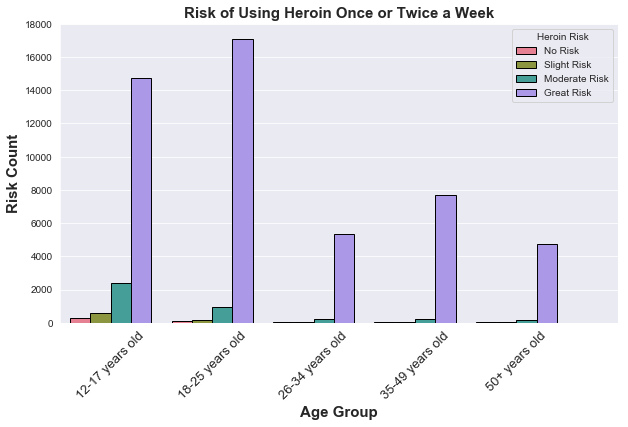

In [6]:
#Create alcohol variable from age variable to only reflect risk of alcohol use
#Eliminate responses less than 94, since 94 represented a non response
heroin = age.loc[drug_risk["Heroin Risk"] < 94]

#Sort values into ascending order
#Convert values into strings
d3 = heroin.sort_values('Heroin Risk', ascending = True)
d3['Heroin Risk'] = d3['Heroin Risk'].apply(str)

#Rename risk levels
d3 = d3.replace({'Heroin Risk': { '1' : 'No Risk'}})
d3 = d3.replace({'Heroin Risk': { '2' : 'Slight Risk'}})
d3 = d3.replace({'Heroin Risk': { '3' : 'Moderate Risk'}})
d3 = d3.replace({'Heroin Risk': { '4' : 'Great Risk'}})

#Prepare seaborn countplot
plt.figure(figsize=(10,5.5))
hr = sns.countplot(x = 'Age Group', hue = 'Heroin Risk', data = d3, palette = 'husl', edgecolor = 'black')
plt.title('Risk of Using Heroin Once or Twice a Week', fontsize = 15, fontweight = 'bold')
plt.ylabel('Risk Count', fontsize = 15, fontweight = 'bold')
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (0,1, 2, 3, 4, 5)
plt.xticks(positions, labels, fontsize = 12,  rotation = (45))
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylim(0, 18000)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.show(hr)
hr.figure.savefig("herRisk.png", bbox_inches = 'tight')

#### Cocaine

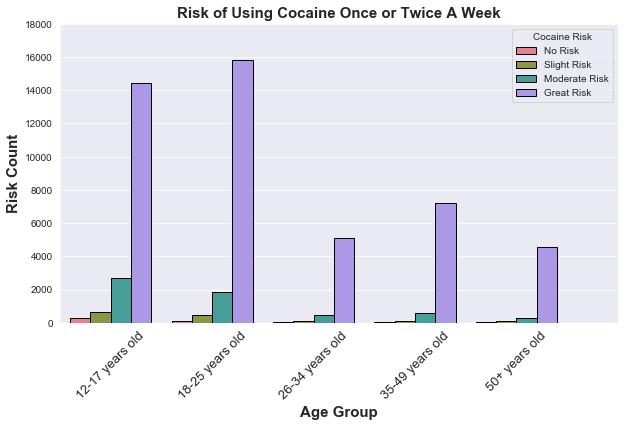

In [7]:
#Create alcohol variable from age variable to only reflect risk of alcohol use
#Eliminate responses less than 94, since 94 represented a non response
cocaine = age.loc[drug_risk["Cocaine Risk"] < 94]

#Sort values into ascending order
#Convert values into strings
d4 = cocaine.sort_values('Cocaine Risk', ascending = True)
d4['Cocaine Risk'] = d4['Cocaine Risk'].apply(str)

#Rename risk levels
d4 = d4.replace({'Cocaine Risk': { '1' : 'No Risk'}})
d4 = d4.replace({'Cocaine Risk': { '2' : 'Slight Risk'}})
d4 = d4.replace({'Cocaine Risk': { '3' : 'Moderate Risk'}})
d4 = d4.replace({'Cocaine Risk': { '4' : 'Great Risk'}})

#Prepare seaborn countplot
plt.figure(figsize=(10,5.5))
cr = sns.countplot(x = 'Age Group', hue = 'Cocaine Risk', data = d4, palette = 'husl', edgecolor = 'black')
plt.title('Risk of Using Cocaine Once or Twice A Week', fontweight = 'bold', fontsize = 15)
plt.ylabel('Risk Count', fontweight = 'bold', fontsize = 15)
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (0,1, 2, 3, 4, 5)
plt.xticks(positions, labels, fontsize = 12,  rotation = (45))
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylim(0, 18000)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.show(cr)
cr.figure.savefig("cocRisk.png", bbox_inches = 'tight')

### Section 2: Random Forest Classifier Model
- Predicting the influence of individual characteristics on substance abuse and dependency
     - Marijuana
     - Alcohol
     - Heroin
     - Cocaine
- Random forest feature importance visualization

### Marijuana Random Forest Classifier

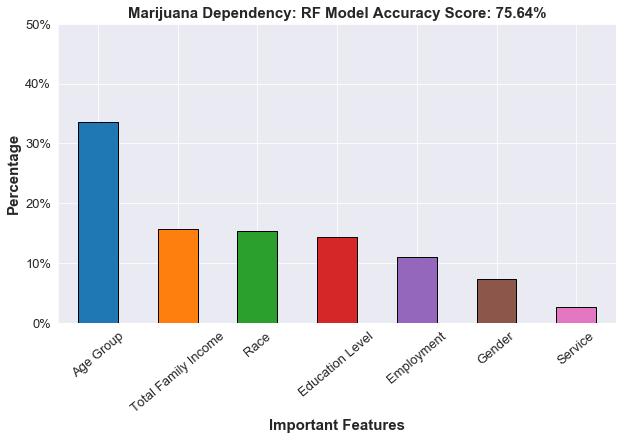

In [8]:
#Create marijuana dependency variable and subset additional variables for employment, age group, military service, total family income, race, education level, and gender
#Rename columns
mj_dep = data[['EMPSTATY','SERVICE','MRJDEP1', 'CATAG3', 'IRFAMIN3', 'EDUCCAT2','NEWRACE2', 'IRSEX']]

mj_dep = mj_dep.rename(columns= {'EMPSTATY': 'Employment','MRJDEP1': 'Marijuana Dependency', 'CATAG3': 'Age Group',
                           'IRFAMIN3': 'Total Family Income', 'EDUCCAT2': 'Education Level',
                           'SERVICE': 'Service', 'NEWRACE2':'Race', 'IRSEX': 'Gender'})

#Eliminate missings values and non responses from columns
mj_dep = mj_dep[mj_dep['Marijuana Dependency'] > -1]
mj_dep = mj_dep[mj_dep['Employment'] < 99]
mj_dep = mj_dep[mj_dep['Service'] < 99]

#Set marijuana dependency as the target
target = 'Marijuana Dependency'

#Set X features and y target
X = mj_dep.drop(columns = [target])
y = mj_dep[target]

#Implement random oversampler to fit the X and y variables to account for the oversampling of youth in the survey
#Ensures that each age group wil be represented and predicted equally without outweighing the other age group
ros = RandomOverSampler(random_state = 0)
X, y = ros.fit_sample(X, y)

#Split data into testing and training sets, 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 0)

#Create Random Forest Classifer model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
mp = model1.score(X_test, y_test)

#Feature importance visualization
X1 = mj_dep.drop(columns = [target])
feature_importance = pd.Series(model1.feature_importances_, index = X1.columns).sort_values(ascending= False)
plt.figure(figsize=(10,5.5))
mdp = 'Marijuana Dependency: RF Model Accuracy Score: {:.2%}'.format(mp)
t = feature_importance.plot(kind='bar', rot=40, fontsize=13, legend = False, edgecolor = 'black')
plt.title(mdp, fontsize = 15, fontweight = 'bold')
plt.xlabel('Important Features', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,.5)
plt.show(t)
t.figure.savefig("mjDep.png", bbox_inches = 'tight')

### Alcohol Random Forest Classifier

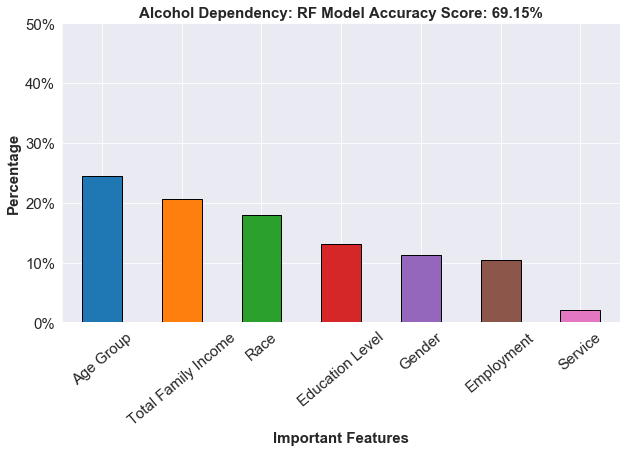

In [9]:
#Create alcohol abuse and dependency variable and subset additional variables for employment, age group, military service, total family income, race, education level, and gender
#Rename columns
alc_dep = data[['EMPSTATY','SERVICE','ABODALC', 'CATAG3','IRFAMIN3', 'EDUCCAT2', 'NEWRACE2', 'IRSEX']]

alc_dep = alc_dep.rename(columns= {'ABODALC': 'Alcohol Dependency', 'CATAG3': 'Age Group',
                           'IRFAMIN3': 'Total Family Income', 'EDUCCAT2': 'Education Level',
                            'NEWRACE2':'Race', 'IRSEX': 'Gender', 'EMPSTATY': 'Employment','SERVICE': 'Service' })

#Eliminate missings values and non responses from columns
alc_dep = alc_dep[alc_dep['Employment'] < 99]
alc_dep = alc_dep[alc_dep['Service'] < 99]

#Set alcohol abuse and dependency as the target
target2 = 'Alcohol Dependency'

#Set X features and y target
X2 = alc_dep.drop(columns = [target2])
y2 = alc_dep[target2]

#Apply random oversampler
X2, y2 = ros.fit_sample(X2,y2)

#Split data into testing and training sets, 90% training and 10% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .10, random_state = 0)

#Create Random Forest Classifer model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)
ap = model2.score(X_test2, y_test2)

#Feature importance visualization
XX2 = alc_dep.drop(columns = [target2])
feature_importance1 = pd.Series(model2.feature_importances_, index = XX2.columns).sort_values(ascending= False)
plt.figure(figsize=(10,5.5))
aldp = 'Alcohol Dependency: RF Model Accuracy Score: {:.2%}'.format(ap)
arf = feature_importance1.plot(kind='bar', rot=40, fontsize=15, legend = False, edgecolor = 'black')
plt.title(aldp, fontsize = 15, fontweight = 'bold')
plt.xlabel('Important Features', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,.5)
plt.show(arf)
arf.figure.savefig("alcDep.png", bbox_inches = 'tight')

### Heroin Random Forest Classifier

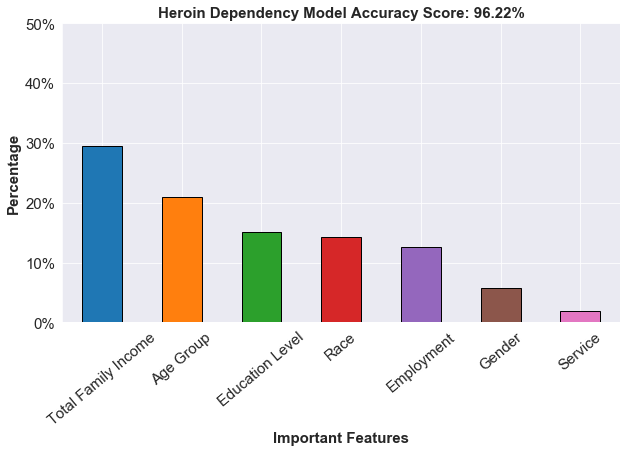

In [10]:
#Create heroin dependency variable and subset additional variables for employment, age group, military service, total family income, race, education level, and gender
#Rename columns
her_dep = data[['EMPSTATY','SERVICE','HERDEP1', 'CATAG3', 'IRFAMIN3', 'EDUCCAT2', 'NEWRACE2', 'IRSEX']]

her_dep = her_dep.rename(columns= {'HERDEP1': 'Heroin Dependency', 'CATAG3': 'Age Group',
                           'IRFAMIN3': 'Total Family Income', 'EDUCCAT2': 'Education Level',
                         'NEWRACE2':'Race', 'IRSEX': 'Gender', 'EMPSTATY': 'Employment','SERVICE': 'Service'})

#Eliminate missings values and non responses from columns
her_dep = her_dep.loc[her_dep['Heroin Dependency'] > -1]
her_dep = her_dep[her_dep['Employment'] < 99]
her_dep = her_dep[her_dep['Service'] < 99]

#Set heroin dependency as the target
target3 = 'Heroin Dependency'

#Set X features and y target
X3 = her_dep.drop(columns = [target3])
y3 = her_dep[target3]

#Apply random oversampler
X3, y3 = ros.fit_sample(X3,y3)

#Split data into testing and training sets, 90% training and 10% testing
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = .10, random_state = 0)

#Create Random Forest Classifer model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
model3 = RandomForestClassifier()
model3.fit(X_train3, y_train3)
hp = model3.score(X_test3, y_test3)

#Feature importance visualization
XX3 = her_dep.drop(columns = [target3])
feature_importance3 = pd.Series(model3.feature_importances_, index = XX3.columns).sort_values(ascending = False)
plt.figure(figsize=(10,5.5))
hdp = 'Heroin Dependency Model Accuracy Score: {:.2%}'.format(hp)
hrf = feature_importance3.plot(kind='bar', rot=40, fontsize=15, legend = False, edgecolor = 'black')
plt.title(hdp, fontsize = 15, fontweight = 'bold')
plt.xlabel('Important Features', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,.5)
plt.show(hrf)
hrf.figure.savefig("herDep.png", bbox_inches = 'tight')

### Cocaine Random Forest Classifier

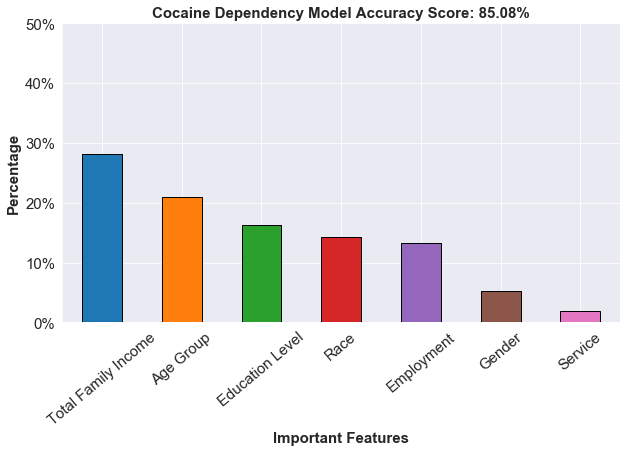

In [11]:
#Create cocaine dependency variable and subset additional variables for employment, age group, military service, total family income, race, education level, and gender
#Renamed columns
coc_dep = data[['EMPSTATY','SERVICE','COCDEP1', 'CATAG3', 'IRFAMIN3', 'EDUCCAT2', 'NEWRACE2', 'IRSEX']]

coc_dep = coc_dep.rename(columns= {'COCDEP1': 'Cocaine Dependency', 'CATAG3': 'Age Group',
                           'IRFAMIN3': 'Total Family Income', 'EDUCCAT2': 'Education Level',
                           'NEWRACE2':'Race', 'IRSEX': 'Gender', 'EMPSTATY': 'Employment','SERVICE': 'Service'})

#Eliminate missings values and non responses from columns
coc_dep = coc_dep.loc[coc_dep['Cocaine Dependency'] > -1]
coc_dep = coc_dep[coc_dep['Employment'] < 99]
coc_dep = coc_dep[coc_dep['Service'] < 99]

#Set cocaine dependency as the target
target4 = 'Cocaine Dependency'

#Set X features and y target
X4 = coc_dep.drop(columns = [target4])
y4 = coc_dep[target4]

#Apply random oversampler 
X4, y4 = ros.fit_sample(X4,y4)

#Split data into testing and training sets, 90% training and 10% testing
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = .10, random_state = 0)

#Create Random Forest Classifer model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
model4 = RandomForestClassifier()
model4.fit(X_train4, y_train4)
cc = model4.score(X_test4, y_test4)

#Feature importance visualization
XX4 = coc_dep.drop(columns = [target4])
feature_importance4 = pd.Series(model4.feature_importances_, index = XX4.columns).sort_values(ascending = False)
plt.figure(figsize=(10,5.5))
cdp = 'Cocaine Dependency Model Accuracy Score: {:.2%}'.format(cc)
crf = feature_importance4.plot(kind='bar', rot=40, fontsize=15, legend = False, edgecolor = 'black')
plt.title(cdp, fontsize = 15, fontweight = 'bold')
plt.xlabel('Important Features', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,.5)
plt.show(crf)
crf.figure.savefig("cocDep.png", bbox_inches = 'tight')

## Section 3: Logistic Regression Model
- Predicting likelihood of substance abuse and dependency for each model
    - Marijuana
    - Alcohol
    - Heroin
    - Cocaine
- Seaborn distribution plot visualization

### Marijuana Logistic Regression Model

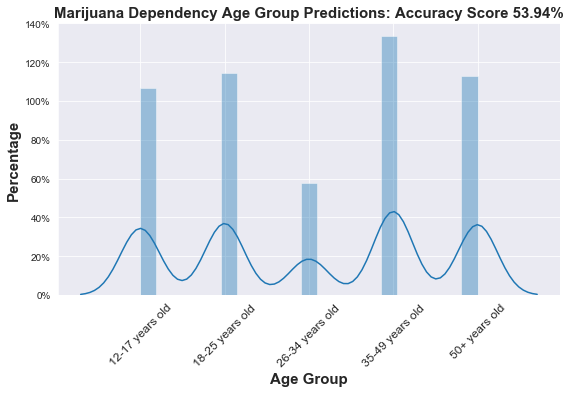

In [12]:
#Create marijuana variable to prepare for regression analysis
#Variable includes age group, marijuana dependency, race, education level, total family income, employment, gender, and service 
mj_age = mj_dep[['Age Group', 'Marijuana Dependency', 'Race', 'Education Level', 'Total Family Income', 
                 'Employment', 'Gender' , 'Service']]

#Set Age Group as the y target, and the remaining variables as the X features
XX = mj_age.drop(columns = ['Age Group'])
yy = mj_age['Age Group']

#Apply random oversampler
XX, yy = ros.fit_sample(XX, yy)

#Split data into testing and training sets, 90% training and 10% testing
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = .10, random_state = 0)

#Create Logistic Regression model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
#Generate y prediction using logistic regression model to predict the X test
modelM1 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', 
                           multi_class = 'auto', max_iter = 100, verbose = 0, random_state = None, n_jobs = 10)
modelM1.fit(XX_train, yy_train)
sm = modelM1.score(XX_test, yy_test)
yy_pred = modelM1.predict(XX_test)

#Prepare Seaborn distribution plot
#Set labels to represent age group categories
#Set y axis to percentage format
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (1, 2, 3, 4, 5, 6, 7)
plt.figure(figsize=(9,5))
plt.xticks(positions, labels, fontsize = 12,  rotation = (45))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
all_sample_title = 'Marijuana Dependency Age Group Predictions: Accuracy Score {:.2%}'.format(sm)
plt.title(all_sample_title, fontsize = 15, fontweight = 'bold')
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.ylim(0,1.40)
m = sns.distplot(yy_pred)
plt.show(m)
m.figure.savefig("mjPred.png", bbox_inches = 'tight' )

### Alcohol Logistic Regression Model

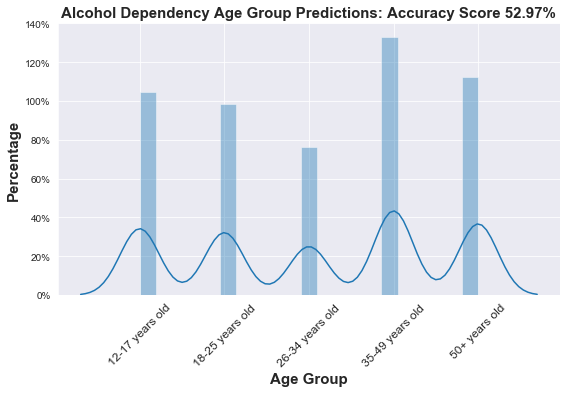

In [13]:
#Create alcohol variable to prepare for regression analysis
#Variable includes age group, marijuana dependency, race, education level, total family income, employment, gender, and service 
alc_age = alc_dep[['Age Group', 'Alcohol Dependency', 'Race', 'Education Level', 'Total Family Income', 'Employment','Gender' , 'Service']]

#Set Age Group as the y target, and the remaining variables as the X features
XXX1 = alc_age.drop(columns = ['Age Group'])
yyy1 = alc_age['Age Group']

#Apply random oversampler
XXX1, yyy1 = ros.fit_sample(XXX1, yyy1)

#Split data into testing and training sets, 90% training and 10% testing
XXX1_train, XXX1_test, yyy1_train, yyy1_test = train_test_split(XXX1, yyy1, test_size = .10, random_state = 0)

#Create Logistic Regression model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
#Generate y prediction using logistic regression model to predict the X test
modelA1 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', 
                           multi_class = 'auto', max_iter = 100, verbose = 0, random_state = None, n_jobs = 10)
modelA1.fit(XXX1_train, yyy1_train)
am = modelA1.score(XXX1_test, yyy1_test)
yy1_pred = modelA1.predict(XXX1_test)

#Prepare Seaborn distribution plot
#Set labels to represent age group categories
#Set y axis to percentage format
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (1, 2, 3, 4, 5, 6, 7)
plt.figure(figsize=(9,5))
plt.xticks(positions, labels, fontsize = 12, rotation = (45))
all_sample_title1 = 'Alcohol Dependency Age Group Predictions: Accuracy Score {:.2%}'.format(am)
plt.title(all_sample_title1, fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
a = sns.distplot(yy1_pred)
plt.ylim(0,1.4)
plt.show(a)
a.figure.savefig("alcPred.png", bbox_inches = 'tight')

### Heroin Logistic Regression Model

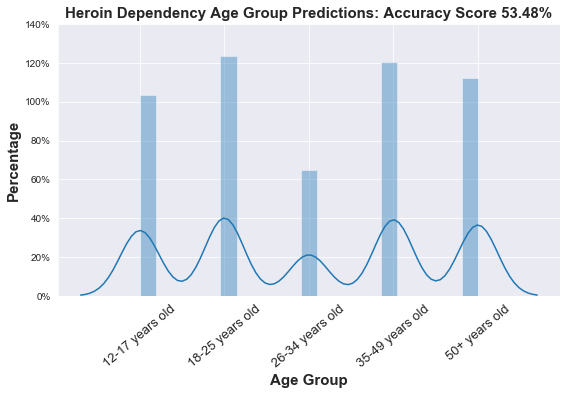

In [14]:
#Create heroin variable to prepare for regression analysis
#Variable includes age group, marijuana dependency, race, education level, total family income, employment, gender, and service 
her_age = her_dep[['Age Group', 'Heroin Dependency', 'Race', 'Education Level', 'Total Family Income', 'Gender', 'Employment', 'Service']]

#Set Age Group as the y target, and the remaining variables as the X features
XXX2 = her_dep.drop(columns = ['Age Group'])
yyy2 = her_dep['Age Group']

#Apply random oversampler
XXX2, yyy2 = ros.fit_sample(XXX2, yyy2)

#Split data into testing and training sets, 90% training and 10% testing
XXX2_train, XXX2_test, yyy2_train, yyy2_test = train_test_split(XXX2, yyy2, test_size = .10, random_state = 0)

#Create Logistic Regression model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
#Generate y prediction using logistic regression model to predict the X test
modelHE1 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', 
                           multi_class = 'auto', max_iter = 100, verbose = 0, random_state = None, n_jobs = 10)
modelHE1.fit(XXX2_train, yyy2_train)
hm = modelHE1.score(XXX2_test, yyy2_test)
yy2_pred = modelHE1.predict(XXX2_test)

#Prepare Seaborn distribution plot
#Set labels to represent age group categories
#Set y axis to percentage format
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (1, 2, 3, 4, 5, 6, 7)
plt.figure(figsize=(9,5))
plt.xticks(positions, labels, fontsize = 9, rotation = (40))
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
all_sample_title2 = 'Heroin Dependency Age Group Predictions: Accuracy Score {:.2%}'.format(hm)
plt.title(all_sample_title2, fontsize = 15, fontweight = 'bold')
h = sns.distplot(yy2_pred)
plt.ylim(0,1.4)
plt.show(h)
h.figure.savefig("herPred.png", bbox_inches = 'tight')

### Cocaine Logistic Regression Model

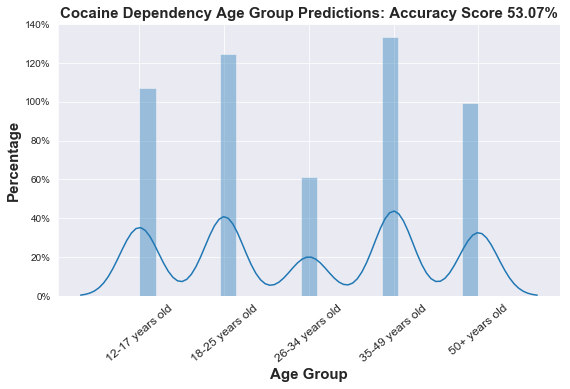

In [15]:
#Create cocaine variable to prepare for regression analysis
#Variable includes age group, marijuana dependency, race, education level, total family income, employment, gender, and service 
coc_age = coc_dep[['Age Group', 'Cocaine Dependency', 'Race', 'Education Level', 'Total Family Income','Employment', 'Service', 'Gender']]

#Set Age Group as the y target, and the remaining variables as the X features
XXX3 = coc_age.drop(columns = ['Age Group'])
yyy3 = coc_age['Age Group']

#Apply random oversampler
XXX3, yyy3 = ros.fit_sample(XXX3, yyy3)

#Split data into testing and training sets, 90% training and 10% testing
XXX3_train, XXX3_test, yyy3_train, yyy3_test = train_test_split(XXX3, yyy3, test_size = .10, random_state = 0)

#Create Logistic Regression model, fit x training and y training sets to the model
#Generate model score using X test and y test sets
#Generate y prediction using logistic regression model to predict the X test
modelC1 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', 
                           multi_class = 'auto', max_iter = 100, verbose = 0, random_state = None, n_jobs = 10)
modelC1.fit(XXX3_train, yyy3_train)
cm = modelC1.score(XXX3_test, yyy3_test)
yy_pred3 = modelC1.predict(XXX3_test)

#Prepare Seaborn distribution plot
#Set labels to represent age group categories
#Set y axis to percentage format
labels = "12-17 years old", "18-25 years old", "26-34 years old", "35-49 years old", "50+ years old"
positions = (1, 2, 3, 4, 5, 6, 7)
plt.figure(figsize=(9,5))
plt.xticks(positions, labels, fontsize = 12, rotation = (40))
plt.xlabel('Age Group', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
all_sample_title3 = 'Cocaine Dependency Age Group Predictions: Accuracy Score {:.2%}'.format(cm)
plt.title(all_sample_title3, fontsize = 15, fontweight = 'bold')
c = sns.distplot(yy_pred3)
plt.ylim(0,1.4)
plt.show(c)
c.figure.savefig("cocPred.png", bbox_inches = 'tight')

## Conclusion

The results showed that the age group that an individual belongs to has a significant impact on their likelihood of experiencing a substance abuse dependency. Age group had either the highest feature importance or the second highest feature importance for each random forest classifier model, showing that it is a powerful indicator in assessing substance abuse and dependency. In comparing the substances, there were more similarities between alcohol and marijuana, and cocaine and heroin. Individuals belonging to various age groups displayed similar responses to marijuana and alcohol, which reveals a shared experience between the two substances for most individuals, regardless of age group category. Between the younger age ranges of 12-17 year olds and 18-25 year olds, 12-17 year olds were more susceptible to alcohol dependency than other substance dependencies that 18-25 year olds were susceptible to. This could be due to accessibility of certain substances, although 18-25 year olds are closer to legal drinking age requirements. 

In comparing 18-25 year olds and individuals who were 50 years and older, it can be seen that younger respondents were more likely to be dependent on 3 out of four of the substances (75%) than older respondents. Individuals between 35-49 years old were the most susceptible out of any age group to be predicted to experience substance abuse and dependency, while individuals between 26-34 years old were the least likely. These age ranges serve as a middle ground between older respondents and younger respondents since they did not show a high level of variance. It can be concluded that in relation to specific drugs such as heroin, marijuana, and cocaine, younger respondents in the 18-25 year old range are more likely to experience a substance dependency, while older respondents in the 50 years and olde age range are more likely to experience an alcohol dependency. Understanding these results can allow this information to be incorporated  into treatment plans and research regarding substance abuse among younger individuals. 
